Linear regression model function:

$$f_{w,b}(x) = wx + b$$
 

$x,y$ can be single values or vectors. 

Cost function, eg. L2 

$$\frac{1}{2m} \sum_i^m (\hat{y}_i - y_i)^2$$

where $y_i$ and $\hat{y}_i$ are the true and predicted values, respectively. m is the total number of samples. 

Pluging in the model function: 

$$J(w,b) = \frac{1}{2m} \sum_i^m (wx_i + b - y_i)^2$$

Differtiating wrt $w$ and $b$:

$$\frac{\partial J}{dw} = \frac{1}{m} \sum_i^m (wx_i + b - y_i)x_i$$

$$\frac{\partial J}{db} = \frac{1}{m} \sum_i^m (wx_i + b - y_i)$$

Gradient descent algorithm. At any step $t$:  

$$w_t = w_{t-1} - \lambda \frac{\partial J_{t-1}}{\partial w}$$

$$b_t = b_{t-1} - \lambda \frac{\partial J_{t-1}}{\partial b}$$

where $\lambda$ is some learning rate. 

In [11]:
import numpy as np 
from matplotlib import pyplot as plt


In [5]:
test =np.array([2,3,4])
test**2

array([ 4,  9, 16])

In [187]:
#define basic functions for univariate LR. 

def linearModel(w,b,x):
    return w*x + b 


def loss_fn(w, b, x, y):
    prefactor = 1 / (2 * (len(x)))
    return np.sum(prefactor * (w * x + b - y)*(w * x + b - y))

def loss_grad(w,b,x,y):
    der_w = 1 / (len(x)) * np.sum(x * (w * x + b - y))
    der_b = 1 / (len(x)) * np.sum((w * x + b - y))
    return (der_w, der_b)

def loss_hessian(w,b,x,y):
    hww = 1 / (len(x)) * (np.sum((w * x + b - y) + w*x))
    hbb = 1 
    hwb = 1 / len(x) * np.sum(x)
    hbw = hwb
    h = np.array([[hww, hwb], [hbw, hbb]])
    eigen, _ = np.linalg.eig(h)
    # only use eigenvalues in the update step. 
    return eigen


def step (w, dw, b, db,lr):
    w = w - lr * dw
    b = b - lr * db
    return(w,b)

def fit_linear(epochs, w, b, x, y, lr, conv = 0.01):
    print ("Initializing fit")
    l = []
    for e in range(epochs):
        loss = loss_fn(w,b,x,y)
        l.append(loss)
        dw, db = loss_grad(w,b,x,y)
        if max(abs(dw), abs(db)) <= conv:
            print(f"Convergence achieved. Max Gradient: {max(dw,db)};  w = {w}, b = {b}")
            return w, b , l
        
        w, b = step(w,dw,b,db,lr)
        
        print(f"Epoch: {e}, Loss: {loss}, Max Grad: {max(dw,db)}, w: {w:.5f}, b: {b:.5f}")
    print("Max epochs reached without convergence")
    return w, b, l

def fit_newton(epochs, w, b, x, y, lr, conv = 0.01):
    print ("Initializing fit with Newton's method:")
    l_acc = []
    for e in range(epochs):

        loss = loss_fn(w,b,x,y)
        l_acc.append(loss)
        dw, db = loss_grad(w,b,x,y)
        adw, adb = abs(dw), abs(db)

        h = loss_hessian(w, b, x, y)

        if max(adw, adb) < conv:
            print(f"Convergence achieved. Max Gradient: {max(adw,adb):.4f} < {conv};  w = {w:.4f}, b = {b:.4f}")
            return w, b , l_acc
        
        # approximation, but should work ok.
        w = w - lr*(1/h[0])*dw
        b = b - lr*(1/h[1])*db
        
        print(f"Epoch: {e}, Loss: {loss:.5f}, Max Grad: {max(adw,adb):.5f}, w: {w:.5f}, b: {b:.5f}")
    print("Max epochs reached without convergence")
    return w, b, l_acc

array([1, 4])

In [188]:
noise = np.random.normal(0.0, 2, size = 100)
x = np.linspace(1, 100, 100) + noise
noise = np.random.normal(0.0, 2, size = 100)
y = np.linspace(1,50, 100) + noise

# plt.scatter(x, y)


Initializing fit
Epoch: 0, Loss: 438.8212353672076, Max Grad: 1715.3584465033534, w: 0.82846, b: 0.99743
Epoch: 1, Loss: 194.1641929727519, Max Grad: 1136.5501824894025, w: 0.71481, b: 0.99573
Epoch: 2, Loss: 86.758928942626, Max Grad: 753.047289081634, w: 0.63950, b: 0.99460
Epoch: 3, Loss: 39.60765667737617, Max Grad: 498.94851683927243, w: 0.58961, b: 0.99385
Epoch: 4, Loss: 18.90808920510001, Max Grad: 330.5894583724077, w: 0.55655, b: 0.99334
Epoch: 5, Loss: 9.820908994831566, Max Grad: 219.03924379782828, w: 0.53465, b: 0.99301
Epoch: 6, Loss: 5.831605801513371, Max Grad: 145.12905159174383, w: 0.52013, b: 0.99278
Epoch: 7, Loss: 4.080287743702807, Max Grad: 96.1581326894279, w: 0.51052, b: 0.99263
Epoch: 8, Loss: 3.311452678357414, Max Grad: 63.711310049090365, w: 0.50415, b: 0.99252
Epoch: 9, Loss: 2.9739309471371795, Max Grad: 42.21291216633714, w: 0.49993, b: 0.99245
Epoch: 10, Loss: 2.825757218514669, Max Grad: 27.968648051146385, w: 0.49713, b: 0.99240
Epoch: 11, Loss: 2.76

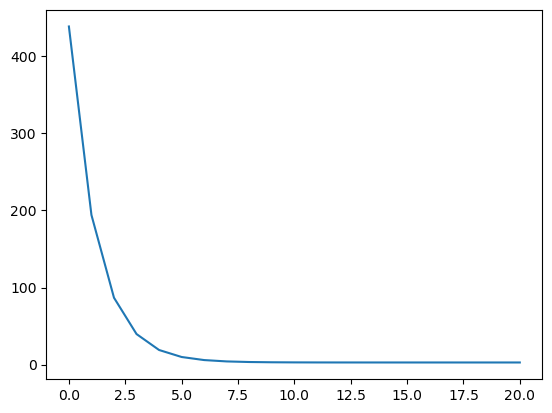

In [192]:
w_guess, b_guess = 1.0, 1.0

x_scaled = x - np.min(x) / (np.max(x) - np.min(x))
y_scaled = y - np.min(y) / (np.max(y) - np.min(y))

w, b, l = fit_linear(50, w_guess, b_guess, x_scaled, y_scaled, 0.0001, conv=0.5)

plt.plot(range(len(l)), l)

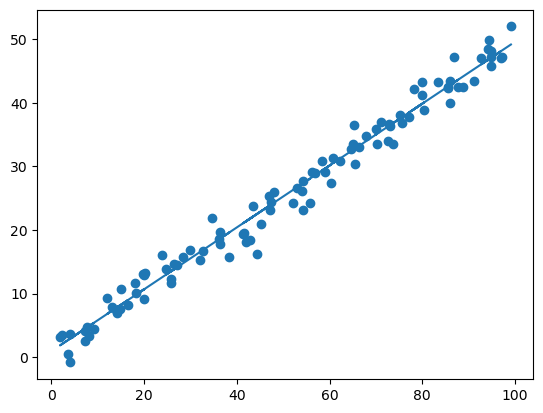

In [157]:
plt.scatter(x,y)
plt.plot(x, linearModel(w,b,x))

Initializing fit with Newton's method:
Epoch: 0, Loss: 416.13504, Max Grad: 1670.12548, w: 0.83369, b: 0.11014
Epoch: 1, Loss: 185.19631, Max Grad: 1109.58348, w: 0.70689, b: 0.11596
Epoch: 2, Loss: 71.68089, Max Grad: 682.11990, w: 0.61973, b: 0.11913
Epoch: 3, Loss: 25.06004, Max Grad: 388.24938, w: 0.56600, b: 0.12078
Epoch: 4, Loss: 9.07373, Max Grad: 207.07169, w: 0.53587, b: 0.12159
Epoch: 5, Loss: 4.36660, Max Grad: 105.45204, w: 0.52008, b: 0.12198
Epoch: 6, Loss: 3.12230, Max Grad: 52.20237, w: 0.51214, b: 0.12215
Epoch: 7, Loss: 2.81432, Max Grad: 25.44165, w: 0.50825, b: 0.12222
Epoch: 8, Loss: 2.74079, Max Grad: 12.29936, w: 0.50635, b: 0.12224
Epoch: 9, Loss: 2.72357, Max Grad: 5.92141, w: 0.50544, b: 0.12223
Epoch: 10, Loss: 2.71957, Max Grad: 2.84444, w: 0.50500, b: 0.12221
Epoch: 11, Loss: 2.71865, Max Grad: 1.36427, w: 0.50479, b: 0.12218
Epoch: 12, Loss: 2.71844, Max Grad: 0.65324, w: 0.50469, b: 0.12216
Convergence achieved. Max Gradient: 0.3119 < 0.5;  w = 0.5047, b

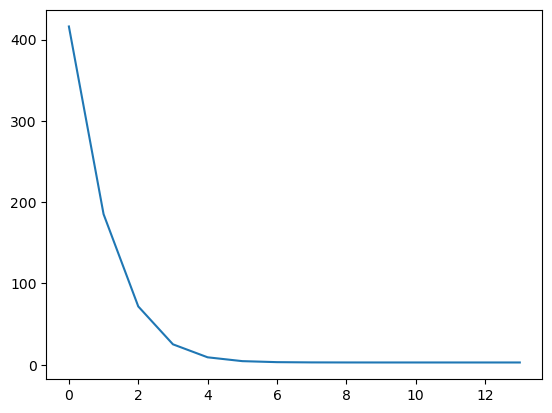

In [190]:
w_guess = 1.0
b_guess = 0.1

wh, bh, l = fit_newton(50, w_guess, b_guess, x_scaled, y_scaled, 0.01 ,conv=0.5)

plt.plot(range(len(l)), l)


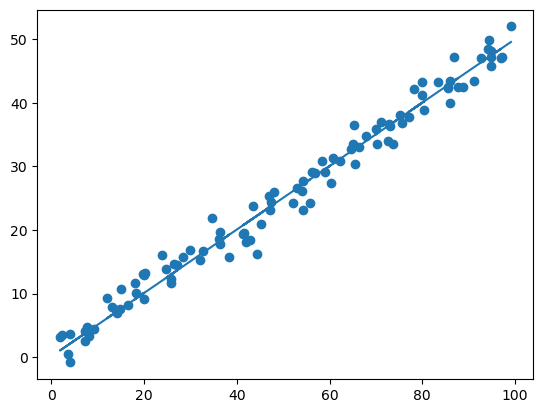

In [162]:
# plt.scatter(x,y)
plt.plot(x, linearModel(wh,bh,x))
plt.scatter(x, y)